In [1]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [2]:
data_folder = "/home/data/simon/processed/test_areas/houston_new/flood"
#figure_folder = "/home/data/simon/result/HSBA_loss2/HSBA_houston"

VV = [JLD.load(joinpath(data_folder,"VV_co.jld"),"data"),
    JLD.load(joinpath(data_folder,"VV_pre_median.jld"),"data")]


VH = [JLD.load(joinpath(data_folder,"VH_co.jld"),"data"), 
    JLD.load(joinpath(data_folder,"VH_pre_median.jld"),"data")];


In [3]:
threshold_indx = 1

1

In [4]:
data_folder = "/home/data/simon/processed/test_areas/houston_new"
VV_files,VH_files,coherence_VV_files,coherence_VH_files = _sort_prossed_files(data_folder);
gamma = [abs.(band) for band in _load_jld(coherence_VV_files,data_folder)]
gamma_co = copy(gamma[1][:,end:-1:1])
gamma_pre = copy((sum(gamma[2:end])./length(gamma[2:end]))[:,end:-1:1]);
gamma= 0

0

In [44]:
change_bandVV = 10 .*log10.(VV[1][:,end:-1:1]) .- 10 .*log10.(VV[2][:,end:-1:1]);

## VV

In [62]:
co = VV[1][:,end:-1:1]
pre = VV[2][:,end:-1:1];

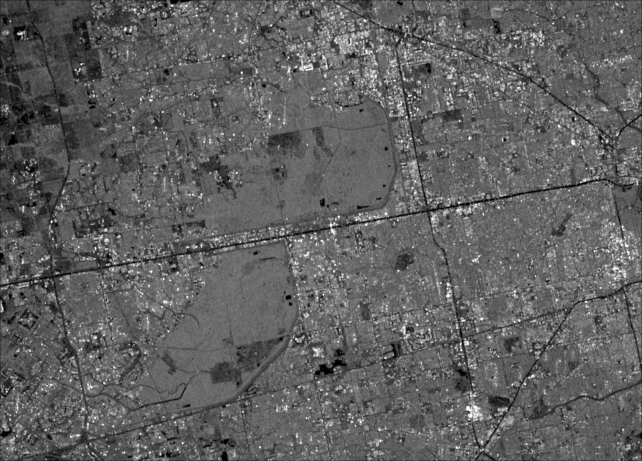

In [63]:
bw_img = pretty_img([pre,pre],min_vv,max_vv,1)

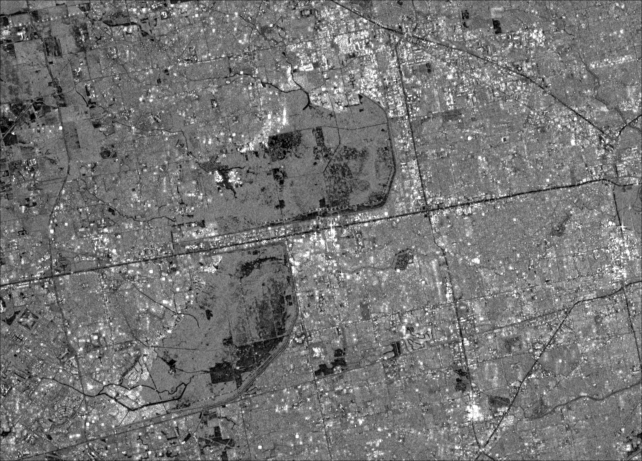

In [75]:
bw_img2 = pretty_img([co,co],min_vv,max_vv,1)

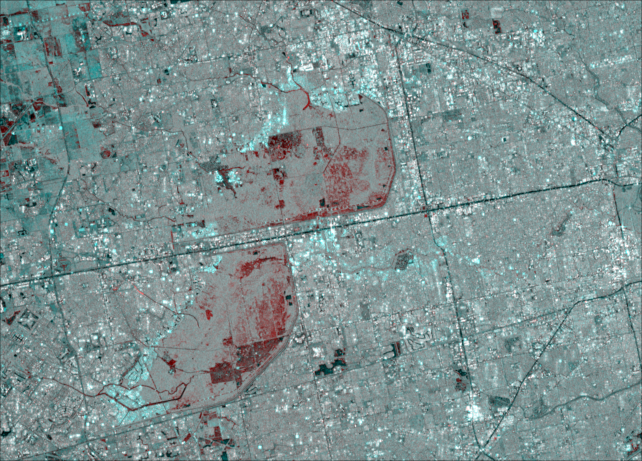

In [6]:
imgVV = pretty_img([co,pre],min_vv,max_vv)

In [7]:
flood_band = 10 .*log10.(co);
ref_band = 10 .*log10.(pre);
change_band = flood_band .- ref_band;

In [29]:
y_seed = -15
rg_thresholds = [-14,-0.2]

2-element Array{Float64,1}:
 -14.0
  -0.2

In [30]:
seed_mask = flood_band .< y_seed;
rg_mask = (flood_band .<rg_thresholds[1]) .& (change_band.<rg_thresholds[2]) .| seed_mask 
flood_mask, steps = region_growing(seed_mask,rg_mask);

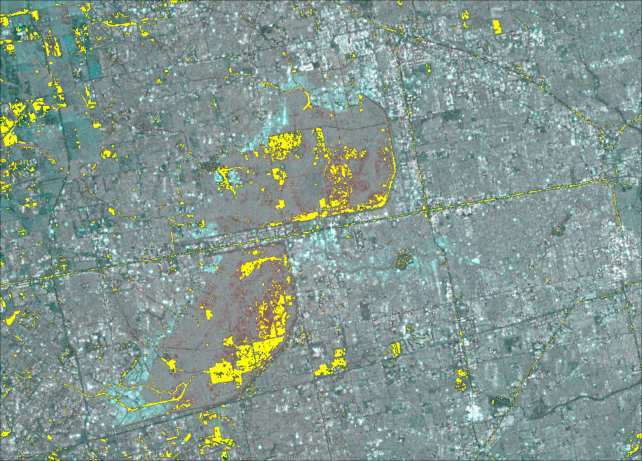

In [31]:
img_save = add_mask(imgVV,flood_mask,(1,1,0))


In [32]:
seed_mask_ref = ref_band .<y_seed
rg_mask_ref = (ref_band .<rg_thresholds[1]) .| seed_mask_ref
ref_mask, steps = region_growing(seed_mask_ref,rg_mask_ref);
    
# Remove flase positives and permant water.
final_mask = flood_mask .& (ref_mask .!=true);

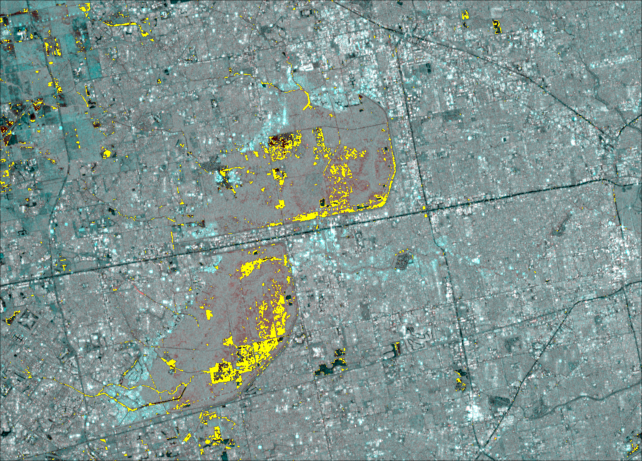

In [33]:
img_save = add_mask(imgVV,final_mask,(1,1,0))


In [34]:
VV_final_mask = copy(final_mask);

## VH

In [35]:
co = VH[1][:,end:-1:1]
pre = VH[2][:,end:-1:1];

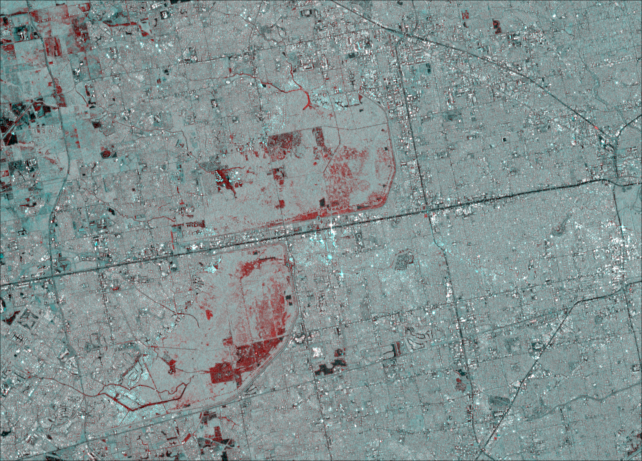

In [36]:
imgVH = pretty_img([co,pre],min_vh,max_vh)

In [37]:
flood_band = 10 .*log10.(co);
ref_band = 10 .*log10.(pre);
change_band = flood_band .- ref_band;

In [38]:
y_seed = -20.525
rg_thresholds = [-20,0]

2-element Array{Int64,1}:
 -20
   0

In [39]:
seed_mask .<y_seed
rg_mask = (flood_band .<rg_thresholds[1]) .& (change_band.<rg_thresholds[2]) .| seed_mask 
flood_mask, steps = region_growing(seed_mask,rg_mask);

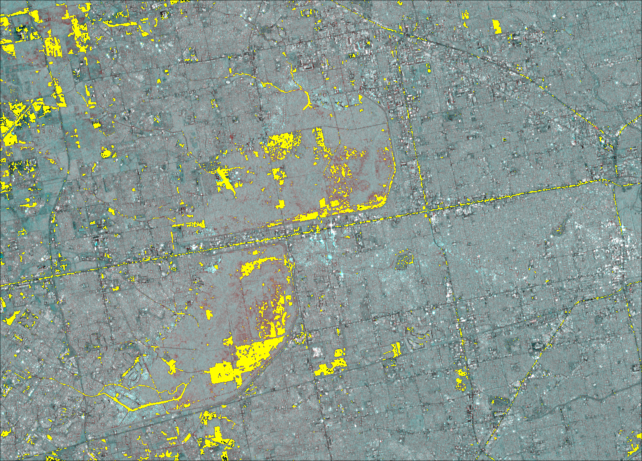

In [40]:
img_save = add_mask(imgVH,flood_mask,(1,1,0))

In [41]:
seed_mask_ref = ref_band .<y_seed
rg_mask_ref = (ref_band .<rg_thresholds[1]) .| seed_mask_ref
ref_mask, steps = region_growing(seed_mask_ref,rg_mask_ref);
    
# Remove flase positives and permant water.
final_mask = flood_mask .& (ref_mask .!=true);

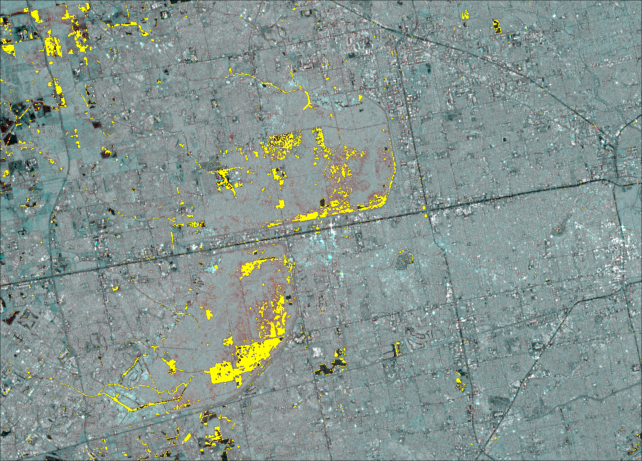

In [42]:
img_save = add_mask(imgVH,final_mask,(1,1,0))

In [55]:

gamma_mask, steps = region_growing(((gamma_co.-gamma_pre).<-0.4 ).& (gamma_pre .> 0.7) .& (change_bandVV .>2),
    ((gamma_co.-gamma_pre).<-0.2 ).& (gamma_pre .> 0.4) .& (change_bandVV .>1));

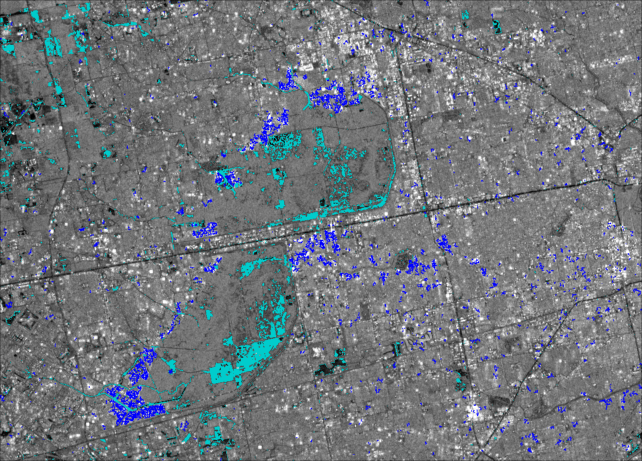

In [76]:
blank = Colors.RGB.(ones(Float32,size(co)),ones(Float32,size(co)),ones(Float32,size(co)))
blank = bw_img2 
test = add_mask(blank, final_mask .| VV_final_mask,(0,0.8,0.8))
test = add_mask(test,gamma_mask,(0,0,1))

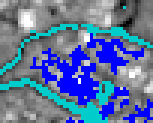

In [77]:
test[760:800,200:250]

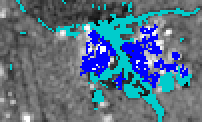

In [78]:
test[330:390,390:490]